In [2]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from tumorsphere.core.simulation import Simulation

## Simulation

In [22]:
sim = Simulation(
    prob_stem=[0.8],
    prob_diff=[0],
    prob_supervivence_radiotherapy=[0.6],
    num_of_realizations=1,
    num_of_steps_per_realization=28,
)

Nota: nunca necesité pasar $s$. Con la idea de la susceptibilidad, toda terapia se puede simular luego de la simulación. Lo único que haría falta es un tipo de output que no haga nada excepto guardar el estado final del esferoide en un `DataFrame`.

In [23]:
sim.simulate_parallel(
    sql=False,
)

## 3 Weeks, $p_s=0.7$

In [5]:
# Let's load the data
df = pd.read_csv(
    "radiotherapy_active_targeted_culture_tf=21_pd=0_ps=0.7_rng_seed=1099062448631258.csv"
)
df.head()

,Unnamed: 0,position_norm,stemness,active,susceptibility
0,0,0.000000,False,False,0.691463
1,1,2.000000,True,False,0.945376
2,2,2.000000,False,False,0.313373
3,3,2.974926,False,False,0.399689
4,4,4.683681,False,False,0.494259


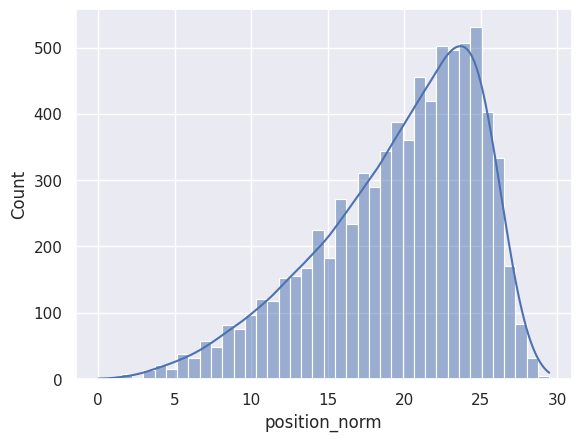

In [9]:
# Let's plot the data
sns.set(style="darkgrid")

sns.histplot(data=df, x="position_norm", kde=True)
plt.show()

In [104]:
# Let's kill some of them

s = 0.7  # survival probability of quiescent cells
beta = 0.5  # active cells have 80% less survival probability

df_active = df.loc[df["active"] == True]
df_quiescent = df.loc[df["active"] == False]

df.loc[df["active"] == False, "killed"] = df["susceptibility"] > s
df.loc[df["active"] == True, "killed"] = df["susceptibility"] > beta * s

df.tail()

,position_norm,stemness,active,susceptibility,killed
21223,35.618547,False,True,0.349660,False
21224,34.370812,False,True,0.056535,False
21225,38.785089,False,True,0.150635,False
21226,37.435570,False,True,0.579744,True
21227,36.812464,False,True,0.960091,True


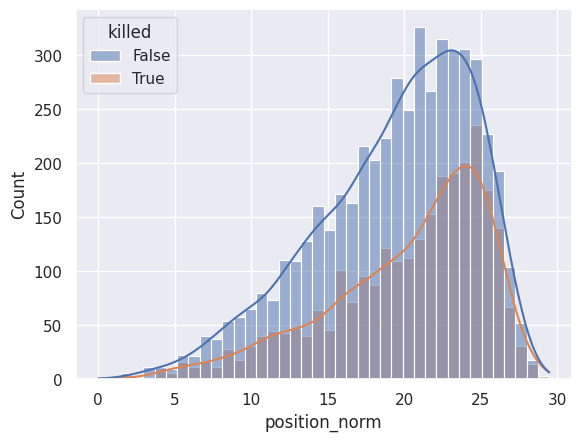

In [17]:
# Let's plot the data
sns.set(style="darkgrid")

sns.histplot(data=df, x="position_norm", kde=True, hue="killed")
plt.show()

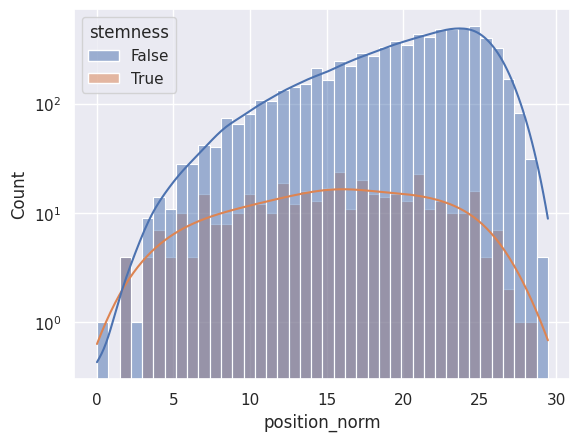

In [21]:
# Let's plot the data
sns.set(style="darkgrid")

sns.histplot(data=df, x="position_norm", kde=True, hue="stemness")
# set y log scale
plt.yscale("log")
plt.show()

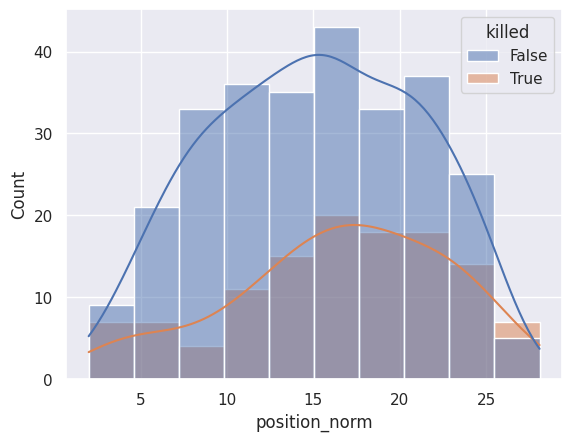

In [19]:
df_stem = df.loc[df["stemness"] == True]

# Let's plot the data
sns.set(style="darkgrid")

sns.histplot(data=df_stem, x="position_norm", kde=True, hue="killed")
plt.show()

## 4 Weeks, $p_s=0.8$

In [24]:
df = pd.read_csv(
    "radiotherapy_active_targeted_culture_tf=28_pd=0_ps=0.8_rng_seed=1099062448631258.csv"
)
df.head()

,Unnamed: 0,position_norm,stemness,active,susceptibility
0,0,0.000000,True,False,0.894803
1,1,2.000000,True,False,0.633878
2,2,2.000000,False,False,0.612602
3,3,2.974926,False,False,0.078773
4,4,4.683681,False,False,0.829732


In [116]:
df.head()

,position_norm,stemness,active,susceptibility,killed
0,0.000000,True,False,0.894803,True
1,2.000000,True,False,0.633878,False
2,2.000000,False,False,0.612602,False
3,2.974926,False,False,0.078773,False
4,4.683681,False,False,0.829732,True


In [117]:
# We set the type of killed to bool
df["killed"] = df["killed"].astype(bool)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21228 entries, 0 to 21227
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   position_norm   21228 non-null  float64
 1   stemness        21228 non-null  bool   
 2   active          21228 non-null  bool   
 3   susceptibility  21228 non-null  float64
 4   killed          21228 non-null  bool   
dtypes: bool(3), float64(2)
memory usage: 394.0 KB


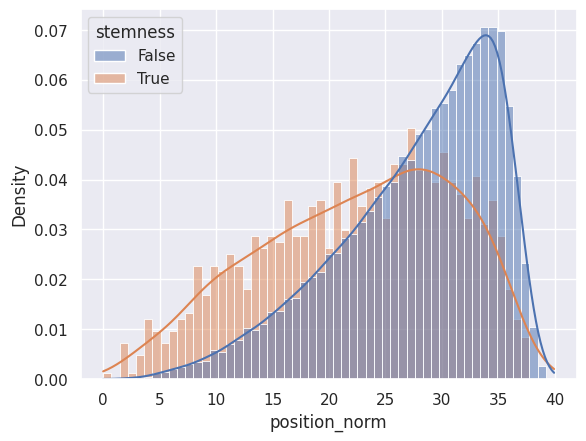

In [41]:
# Let's plot the data
sns.set(style="darkgrid")

sns.histplot(
    data=df,
    x="position_norm",
    kde=True,
    hue="stemness",
    stat="density",
    common_norm=False,
)
# plt.yscale("log")
plt.show()

In [29]:
# Let's kill some of them

s = 0.7  # survival probability of quiescent cells
beta = 0.8  # active cells have 80% less survival probability

df_active = df.loc[df["active"] == True]
df_quiescent = df.loc[df["active"] == False]

df.loc[df["active"] == False, "killed"] = df["susceptibility"] > s
df.loc[df["active"] == True, "killed"] = df["susceptibility"] > beta * s

df.tail()

,Unnamed: 0,position_norm,stemness,active,susceptibility,killed
21223,21223,35.618547,False,True,0.349660,False
21224,21224,34.370812,False,True,0.056535,False
21225,21225,38.785089,False,True,0.150635,False
21226,21226,37.435570,False,True,0.579744,True
21227,21227,36.812464,False,True,0.960091,True


In [30]:
df.columns

Index(['Unnamed: 0', 'position_norm', 'stemness', 'active', 'susceptibility',
       'killed'],
      dtype='object')

In [31]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [32]:
df

,position_norm,stemness,active,susceptibility,killed
0,0.000000,True,False,0.894803,True
1,2.000000,True,False,0.633878,False
2,2.000000,False,False,0.612602,False
3,2.974926,False,False,0.078773,False
4,4.683681,False,False,0.829732,True
...,...,...,...,...,...
21223,35.618547,False,True,0.349660,False
21224,34.370812,False,True,0.056535,False
21225,38.785089,False,True,0.150635,False
21226,37.435570,False,True,0.579744,True


<Axes: xlabel='position_norm', ylabel='Density'>

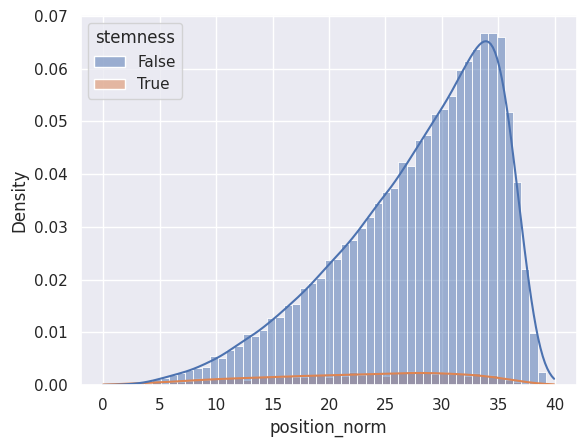

In [102]:
sns.histplot(
    data=df,
    x="position_norm",
    kde=True,
    hue="stemness",
    stat="density",
    common_norm=True,
)

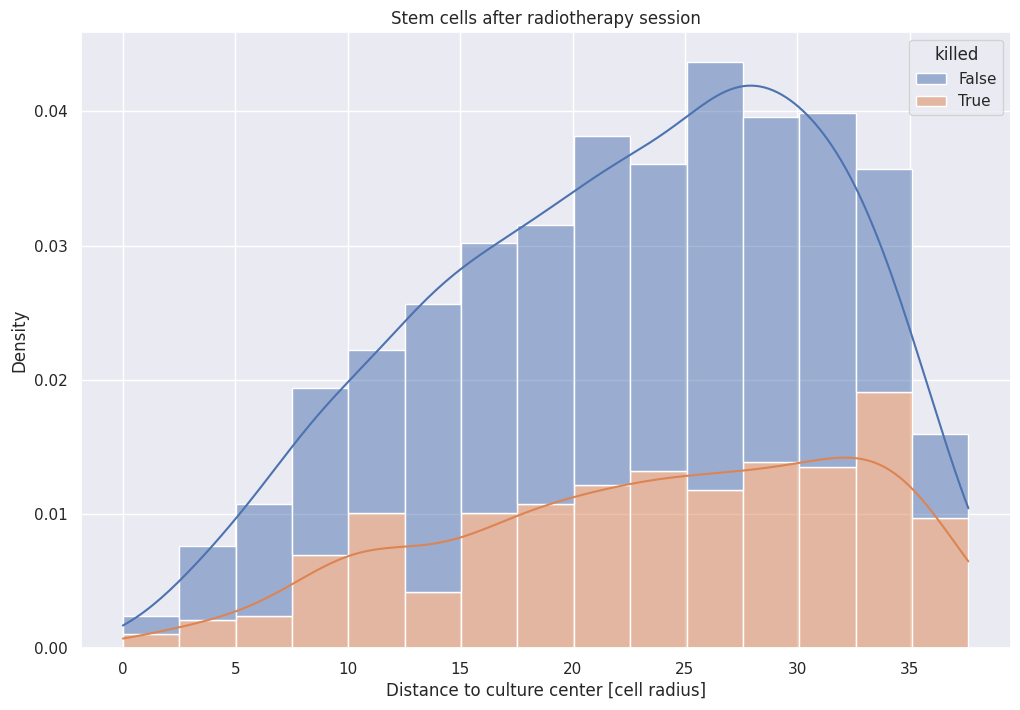

In [105]:
df_stem = df.loc[df["stemness"] == True]

# Let's plot the data
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))


sns.histplot(
    data=df_stem,
    x="position_norm",
    kde=True,
    hue="killed",
    stat="density",
    common_norm=True,
    multiple="stack",
)
plt.xlabel("Distance to culture center [cell radius]")
plt.title("Stem cells after radiotherapy session")
plt.show()

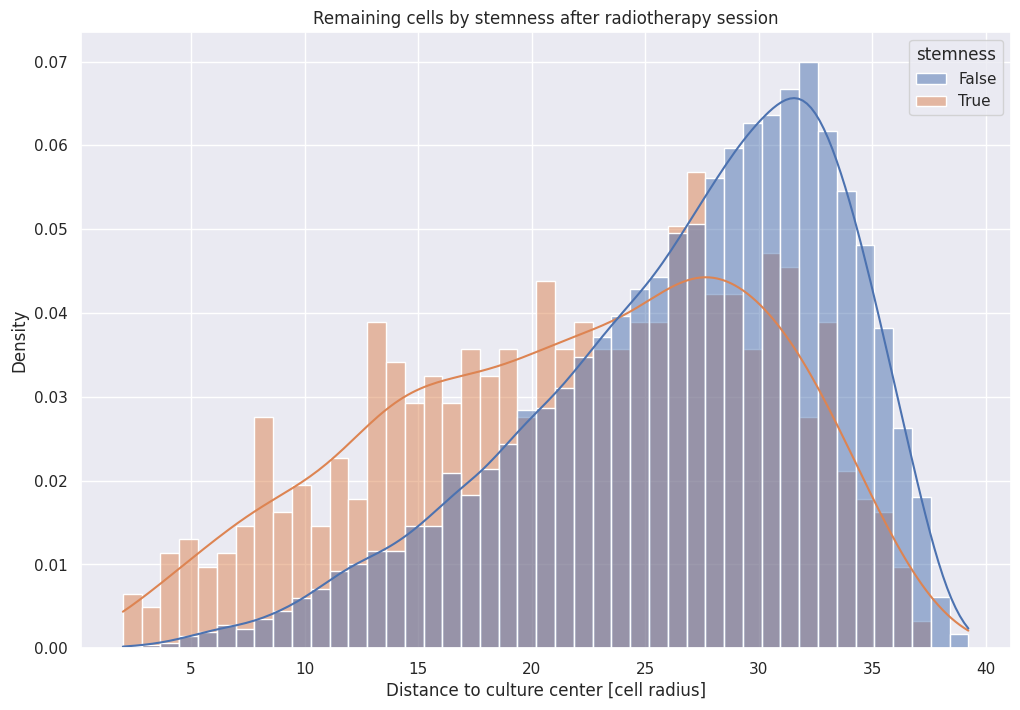

In [108]:
# Let's plot the data
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))


# Let's see the ones we killed
df_killed = df.loc[df["killed"] == True]
df_alive = df.loc[df["killed"] == False]

sns.histplot(
    data=df_alive,
    x="position_norm",
    kde=True,
    hue="stemness",
    stat="density",
    common_norm=False,
)
plt.xlabel("Distance to culture center [cell radius]")
plt.title("Remaining cells by stemness after radiotherapy session")
plt.show()

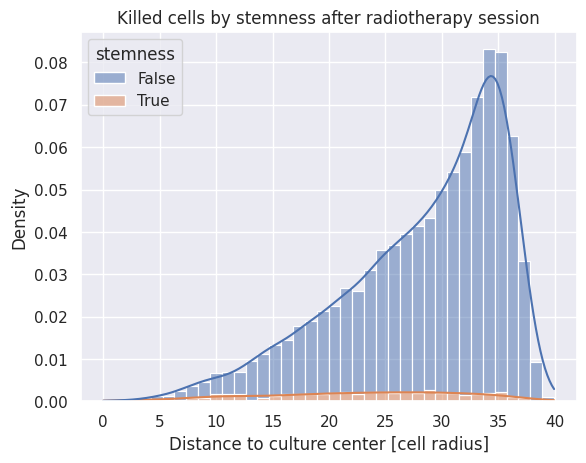

In [50]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_killed = df.loc[df["killed"] == True]

sns.histplot(
    data=df_killed,
    x="position_norm",
    kde=True,
    hue="stemness",
    stat="density",
    common_norm=True,
    multiple="stack",
)
plt.xlabel("Distance to culture center [cell radius]")
plt.title("Killed cells by stemness after radiotherapy session")
plt.show()

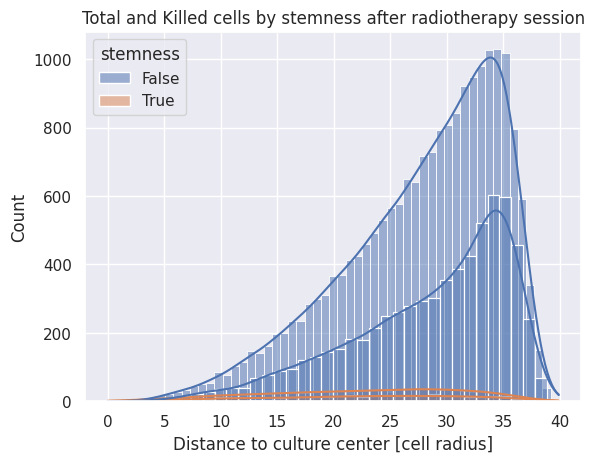

In [52]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_killed = df.loc[df["killed"] == True]

sns.histplot(data=df, x="position_norm", kde=True, hue="stemness")
sns.histplot(data=df_killed, x="position_norm", kde=True, hue="stemness")
plt.xlabel("Distance to culture center [cell radius]")
plt.title("Total and Killed cells by stemness after radiotherapy session")
plt.show()

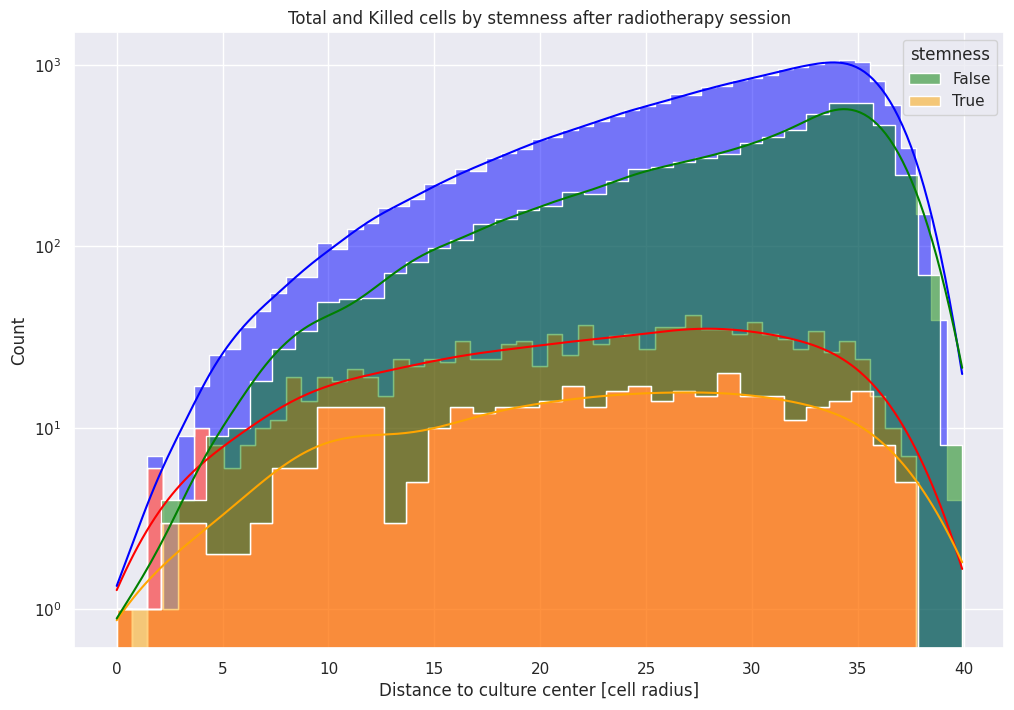

In [57]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_killed = df.loc[df["killed"] == True]

# Define custom color palettes
palette_total = {True: "red", False: "blue"}
palette_killed = {True: "orange", False: "green"}

# Set figure size
plt.figure(figsize=(12, 8))

# Plot histograms with different colors for stemness
sns.histplot(
    data=df,
    x="position_norm",
    kde=True,
    hue="stemness",
    palette=palette_total,
    multiple="stack",
    element="step",
)
sns.histplot(
    data=df_killed,
    x="position_norm",
    kde=True,
    hue="stemness",
    palette=palette_killed,
    multiple="stack",
    element="step",
)

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.title("Total and Killed cells by stemness after radiotherapy session")
plt.yscale("log")
plt.show()

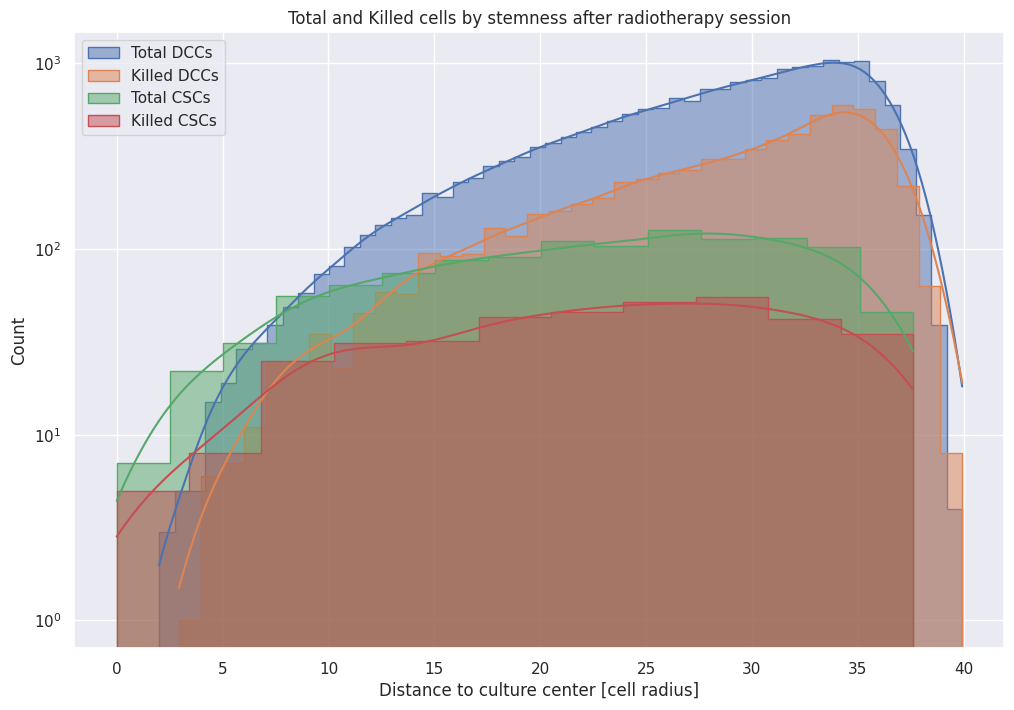

In [65]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_killed_csc = df.loc[(df["killed"] == True) & (df["stemness"] == True)]
df_killed_dcc = df.loc[(df["killed"] == True) & (df["stemness"] == False)]
df_alive_csc = df.loc[(df["killed"] == False) & (df["stemness"] == True)]
df_alive_dcc = df.loc[(df["killed"] == False) & (df["stemness"] == False)]

df_total_dcc = df.loc[df["stemness"] == False]
df_total_csc = df.loc[df["stemness"] == True]

# # Define custom color palettes
# palette_total = {True: "red", False: "blue"}
# palette_killed = {True: "orange", False: "green"}

# Set figure size
plt.figure(figsize=(12, 8))

# Plot histograms with different colors for stemness
# sns.histplot(data=df, x="position_norm", kde=True, hue="stemness", palette=palette_total, multiple="stack", element="step", alpha=1)
# sns.histplot(data=df_killed, x="position_norm", kde=True, hue="stemness", palette=palette_killed, multiple="stack", element="step", alpha=1)

sns.histplot(
    data=df_total_dcc,
    x="position_norm",
    kde=True,
    label="Total DCCs",
    element="step",
)  # , color="blue"
sns.histplot(
    data=df_killed_dcc,
    x="position_norm",
    kde=True,
    label="Killed DCCs",
    element="step",
)  # , color="green"
sns.histplot(
    data=df_total_csc,
    x="position_norm",
    kde=True,
    label="Total CSCs",
    element="step",
)  # , color="red"
sns.histplot(
    data=df_killed_csc,
    x="position_norm",
    kde=True,
    label="Killed CSCs",
    element="step",
)  # , color="orange"

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.title("Total and Killed cells by stemness after radiotherapy session")
plt.yscale("log")

# # Create custom legend
# from matplotlib.patches import Patch

# legend_labels = [
#     Patch(color="red", label="Total CSCs"),
#     Patch(color="blue", label="Total DCCs"),
#     Patch(color="orange", label="Killed CSCs"),
#     Patch(color="green", label="Killed DCCs")
# ]

# plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
# Show plot
plt.show()

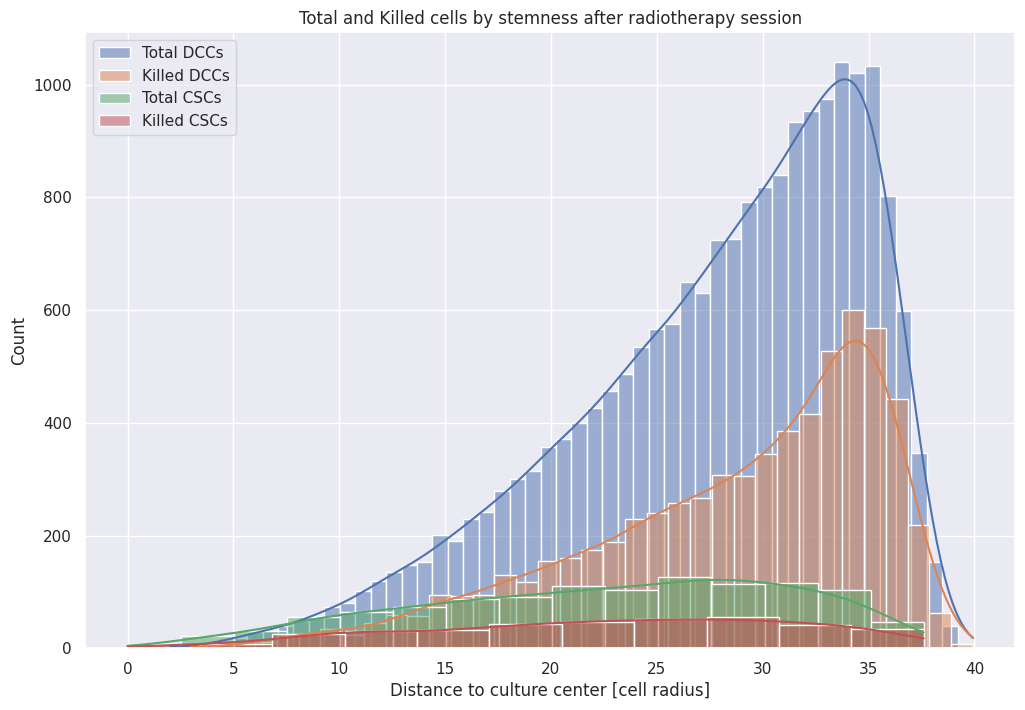

In [70]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_killed_csc = df.loc[(df["killed"] == True) & (df["stemness"] == True)]
df_killed_dcc = df.loc[(df["killed"] == True) & (df["stemness"] == False)]
df_alive_csc = df.loc[(df["killed"] == False) & (df["stemness"] == True)]
df_alive_dcc = df.loc[(df["killed"] == False) & (df["stemness"] == False)]

df_total_dcc = df.loc[df["stemness"] == False]
df_total_csc = df.loc[df["stemness"] == True]

# Set figure size
plt.figure(figsize=(12, 8))

sns.histplot(
    data=df_total_dcc,
    x="position_norm",
    kde=True,
    label="Total DCCs",
    element="step",
    stat="count",
)  # , color="blue"
sns.histplot(
    data=df_killed_dcc,
    x="position_norm",
    kde=True,
    label="Killed DCCs",
    element="step",
    stat="count",
)  # , color="green"
sns.histplot(
    data=df_total_csc,
    x="position_norm",
    kde=True,
    label="Total CSCs",
    element="step",
    stat="count",
)  # , color="red"
sns.histplot(
    data=df_killed_csc,
    x="position_norm",
    kde=True,
    label="Killed CSCs",
    element="step",
    stat="count",
)  # , color="orange"

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.title("Total and Killed cells by stemness after radiotherapy session")
# plt.yscale("log")

plt.legend()

# Show plot
plt.show()

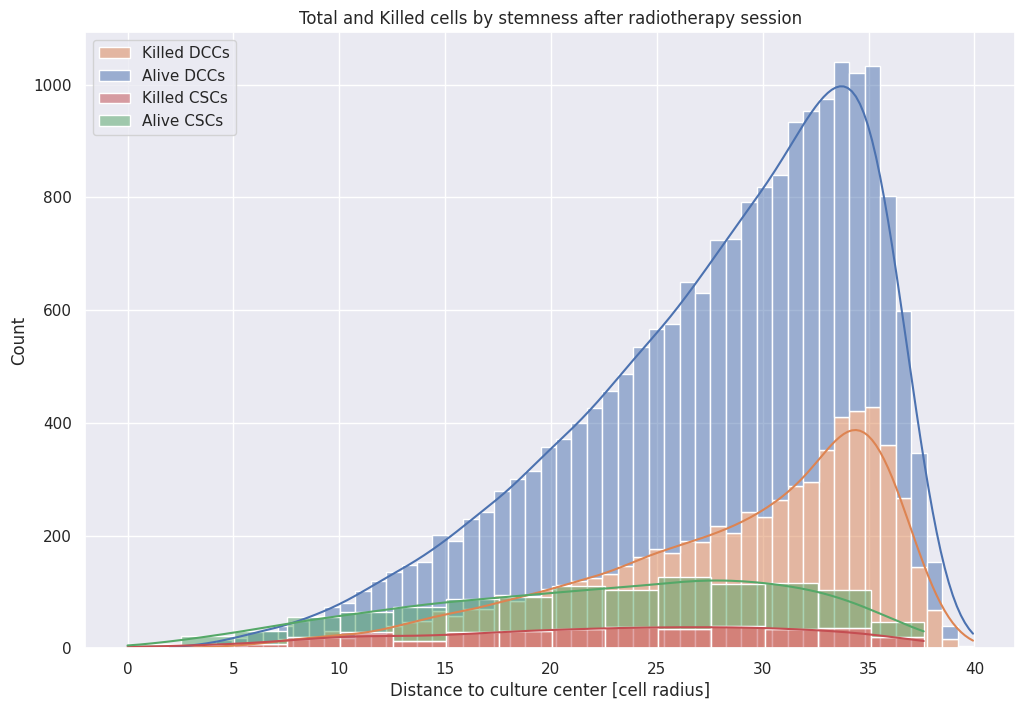

In [82]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_total_dcc = df.loc[df["stemness"] == False]
df_total_csc = df.loc[df["stemness"] == True]

# Extract the default color palette
default_palette = sns.color_palette()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot histograms with different colors for 'killed' using the default palette
sns.histplot(
    data=df_total_dcc,
    x="position_norm",
    kde=True,
    hue="killed",
    label="Total DCCs",
    multiple="stack",
    element="bars",
    stat="count",
    palette=[default_palette[0], default_palette[1]],
)
sns.histplot(
    data=df_total_csc,
    x="position_norm",
    kde=True,
    hue="killed",
    label="Total CSCs",
    multiple="stack",
    element="bars",
    stat="count",
    palette=[default_palette[2], default_palette[3]],
)

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.title("Total and Killed cells by stemness after radiotherapy session")

# Create custom legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Killed DCCs", "Alive DCCs", "Killed CSCs", "Alive CSCs"]

plt.legend(handles, labels, loc="upper left")

# Blue: Alive DCCs
# Orange: Killed DCCs
# Green: Alive CSCs
# Red: Killed CSCs

# Show plot
plt.show()

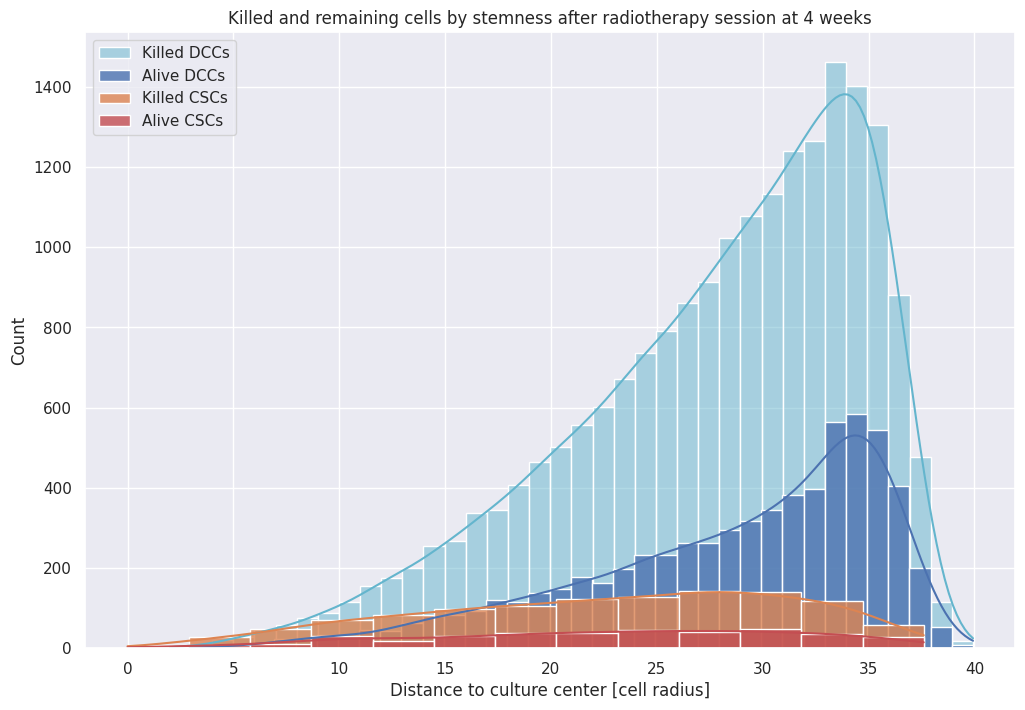

In [95]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_killed_csc = df.loc[(df["killed"] == True) & (df["stemness"] == True)]
df_killed_dcc = df.loc[(df["killed"] == True) & (df["stemness"] == False)]
df_alive_csc = df.loc[(df["killed"] == False) & (df["stemness"] == True)]
df_alive_dcc = df.loc[(df["killed"] == False) & (df["stemness"] == False)]

df_total_dcc = df.loc[df["stemness"] == False]
df_total_csc = df.loc[df["stemness"] == True]

# Extract the default color palette
default_palette = sns.color_palette()

# Set figure size
plt.figure(figsize=(12, 8))

sns.histplot(
    data=df_total_dcc,
    x="position_norm",
    kde=True,
    label="Killed DCCs",
    element="bars",
    stat="count",
    binwidth=1,
    color=default_palette[9],
)
sns.histplot(
    data=df_killed_dcc,
    x="position_norm",
    kde=True,
    label="Alive DCCs",
    element="bars",
    stat="count",
    binwidth=1,
    alpha=0.8,
    color=default_palette[0],
)
sns.histplot(
    data=df_total_csc,
    x="position_norm",
    kde=True,
    label="Killed CSCs",
    element="bars",
    stat="count",
    binwidth=3,
    alpha=0.8,
    color=default_palette[1],
)
sns.histplot(
    data=df_killed_csc,
    x="position_norm",
    kde=True,
    label="Alive CSCs",
    element="bars",
    stat="count",
    binwidth=3,
    alpha=0.8,
    color=default_palette[3],
)

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.title(
    "Killed and remaining cells by stemness after radiotherapy session at 4 weeks"
)
# plt.yscale("log")

plt.legend()

# Show plot
plt.show()

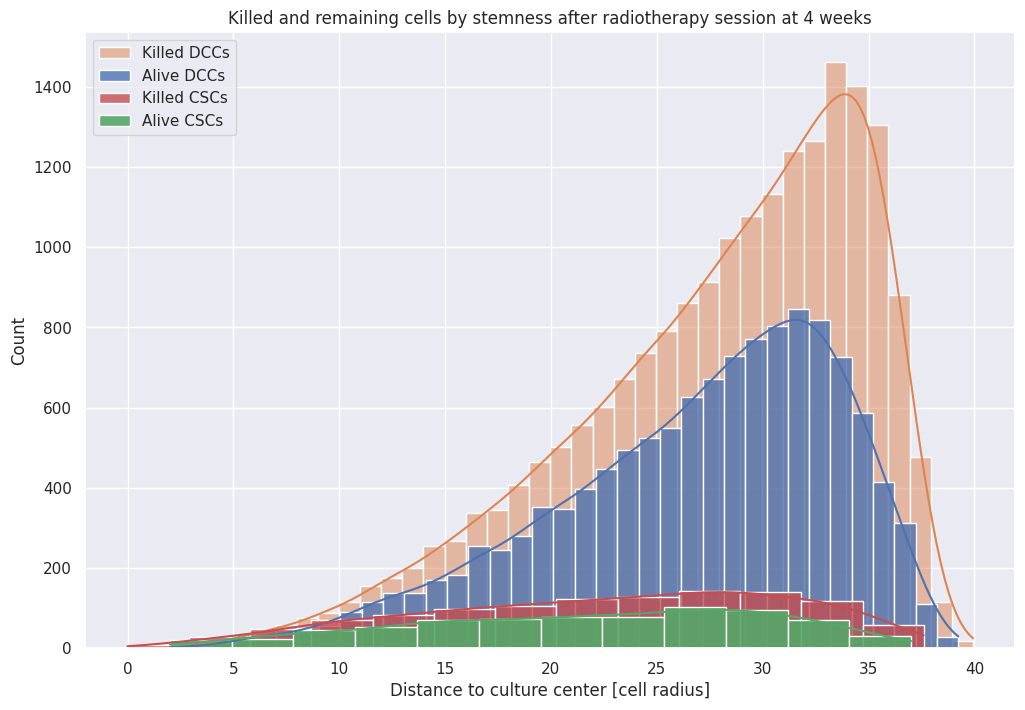

In [109]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_killed_csc = df.loc[(df["killed"] == True) & (df["stemness"] == True)]
df_killed_dcc = df.loc[(df["killed"] == True) & (df["stemness"] == False)]
df_alive_csc = df.loc[(df["killed"] == False) & (df["stemness"] == True)]
df_alive_dcc = df.loc[(df["killed"] == False) & (df["stemness"] == False)]

df_total_dcc = df.loc[df["stemness"] == False]
df_total_csc = df.loc[df["stemness"] == True]

# Extract the default color palette
default_palette = sns.color_palette()

# Set figure size
plt.figure(figsize=(12, 8))

sns.histplot(
    data=df_total_dcc,
    x="position_norm",
    kde=True,
    label="Killed DCCs",
    element="bars",
    stat="count",
    binwidth=1,
    color=default_palette[1],
)
sns.histplot(
    data=df_alive_dcc,
    x="position_norm",
    kde=True,
    label="Alive DCCs",
    element="bars",
    stat="count",
    binwidth=1,
    alpha=0.8,
    color=default_palette[0],
)
sns.histplot(
    data=df_total_csc,
    x="position_norm",
    kde=True,
    label="Killed CSCs",
    element="bars",
    stat="count",
    binwidth=3,
    alpha=0.8,
    color=default_palette[3],
)
sns.histplot(
    data=df_alive_csc,
    x="position_norm",
    kde=True,
    label="Alive CSCs",
    element="bars",
    stat="count",
    binwidth=3,
    alpha=0.9,
    color=default_palette[2],
)

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.title(
    "Killed and remaining cells by stemness after radiotherapy session at 4 weeks"
)
# plt.yscale("log")

plt.legend()

# Show plot
plt.show()

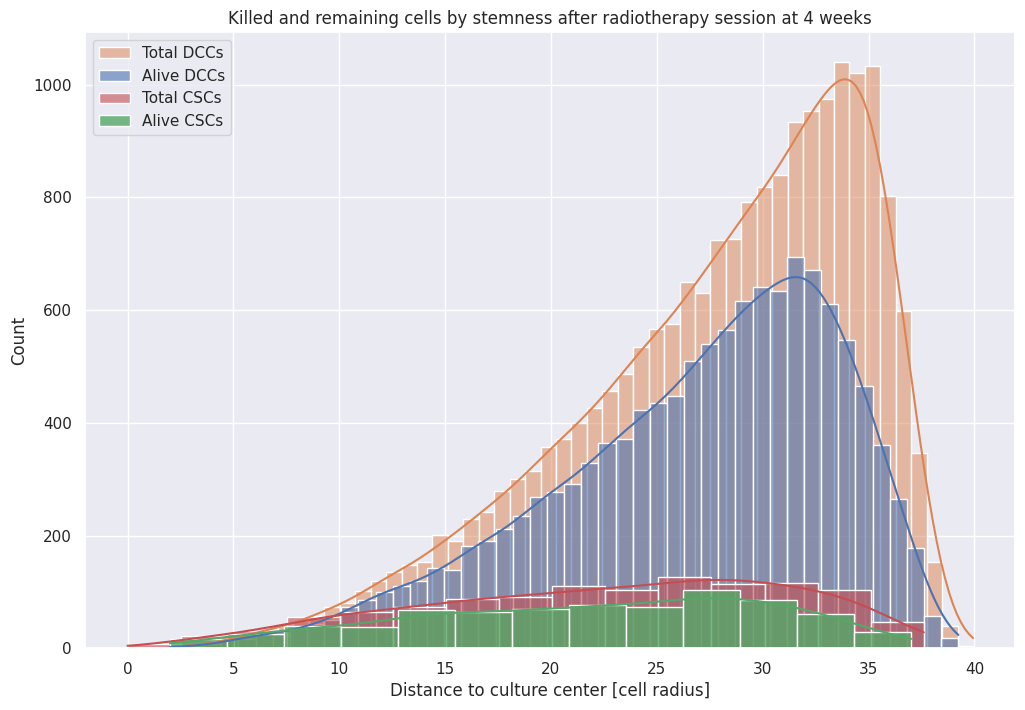

In [113]:
# Let's set the style
sns.set(style="darkgrid")

# Let's see the ones we killed
df_killed_csc = df.loc[(df["killed"] == True) & (df["stemness"] == True)]
df_killed_dcc = df.loc[(df["killed"] == True) & (df["stemness"] == False)]
df_alive_csc = df.loc[(df["killed"] == False) & (df["stemness"] == True)]
df_alive_dcc = df.loc[(df["killed"] == False) & (df["stemness"] == False)]

df_total_dcc = df.loc[df["stemness"] == False]
df_total_csc = df.loc[df["stemness"] == True]

# Extract the default color palette
default_palette = sns.color_palette()

# Set figure size
plt.figure(figsize=(12, 8))

sns.histplot(
    data=df_total_dcc,
    x="position_norm",
    kde=True,
    label="Total DCCs",
    element="bars",
    stat="count",
    color=default_palette[1],
)
sns.histplot(
    data=df_alive_dcc,
    x="position_norm",
    kde=True,
    label="Alive DCCs",
    element="bars",
    stat="count",
    alpha=0.6,
    color=default_palette[0],
)
sns.histplot(
    data=df_total_csc,
    x="position_norm",
    kde=True,
    label="Total CSCs",
    element="bars",
    stat="count",
    alpha=0.6,
    color=default_palette[3],
)
sns.histplot(
    data=df_alive_csc,
    x="position_norm",
    kde=True,
    label="Alive CSCs",
    element="bars",
    stat="count",
    alpha=0.8,
    color=default_palette[2],
)

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.title(
    "Killed and remaining cells by stemness after radiotherapy session at 4 weeks"
)
# plt.yscale("log")

plt.legend()

# Show plot
plt.show()

array([ 2.        ,  2.        ,  3.96095616,  2.        ,  2.95671617,
        2.        ,  4.74723304,  3.7528232 ,  4.12277746,  3.84139256,
        3.4259741 ,  5.24557159,  4.52713077,  5.6416426 ,  5.35849314,
        3.9300866 ,  3.69612164,  4.80335745,  4.91647517,  6.69885532,
        3.51821377,  7.06852613,  4.30937157,  6.39568026,  4.68393887,
        6.09056403,  5.03359547,  7.45745472,  8.46050667,  6.37180011,
        4.7808593 ,  6.25636311,  6.02265085,  6.03991099,  7.04620923,
        8.24931024,  7.47313493,  7.00714856,  7.08869363,  6.04639499,
        7.06663177,  8.27803483,  7.99355078,  7.31787261,  7.89592769,
        6.23752189,  7.86987008,  9.37887947,  8.91375482,  6.85196555,
        6.87532072,  7.38755032,  8.40834504,  8.16288608,  7.9929446 ,
        9.04556425,  8.10374666, 10.23884571,  9.50704302,  8.26542499,
        9.52218729,  8.54945542,  9.34475113,  8.35389955,  9.21972726,
       10.23326514,  9.8163352 , 10.38367032,  9.71596902,  8.24

In [125]:
# Create a new dataframe to store the percentage of alive cells per bin
bins = 30  # You can adjust the number of bins as needed
df["bin"] = pd.cut(df["position_norm"], bins=bins)

In [126]:
df

,position_norm,stemness,active,susceptibility,killed,bin
0,0.000000,True,False,0.894803,True,"(-0.0399, 1.331]"
1,2.000000,True,False,0.633878,False,"(1.331, 2.662]"
2,2.000000,False,False,0.612602,False,"(1.331, 2.662]"
3,2.974926,False,False,0.078773,False,"(2.662, 3.993]"
4,4.683681,False,False,0.829732,True,"(3.993, 5.324]"
...,...,...,...,...,...,...
21223,35.618547,False,True,0.349660,False,"(34.606, 35.937]"
21224,34.370812,False,True,0.056535,False,"(33.275, 34.606]"
21225,38.785089,False,True,0.150635,False,"(38.598, 39.929]"
21226,37.435570,False,True,0.579744,True,"(37.267, 38.598]"


In [ ]:
# Calculate percentage of alive cells per bin
alive_counts = (
    df[df["killed"] == False]
    .groupby(["bin", "stemness"], observed=True)
    .size()
)
total_counts = df.groupby(["bin", "stemness"], observed=True).size()
alive_percentage = (alive_counts / total_counts * 100).reset_index(
    name="alive_percentage"
)

# Convert the bin labels to their midpoints
alive_percentage["bin_mid"] = alive_percentage["bin"].apply(lambda x: x.mid)

In [129]:
alive_percentage.head()

,bin,stemness,alive_percentage,bin_mid
0,"(-0.0399, 1.331]",True,NaN,0.64555
1,"(1.331, 2.662]",False,100.000000,1.99650
2,"(1.331, 2.662]",True,66.666667,1.99650
3,"(2.662, 3.993]",False,85.714286,3.32750
4,"(2.662, 3.993]",True,66.666667,3.32750


In [132]:
alive_counts.head()

bin             stemness
(1.331, 2.662]  False        3
                True         4
(2.662, 3.993]  False        6
                True         8
(3.993, 5.324]  False       20
dtype: int64

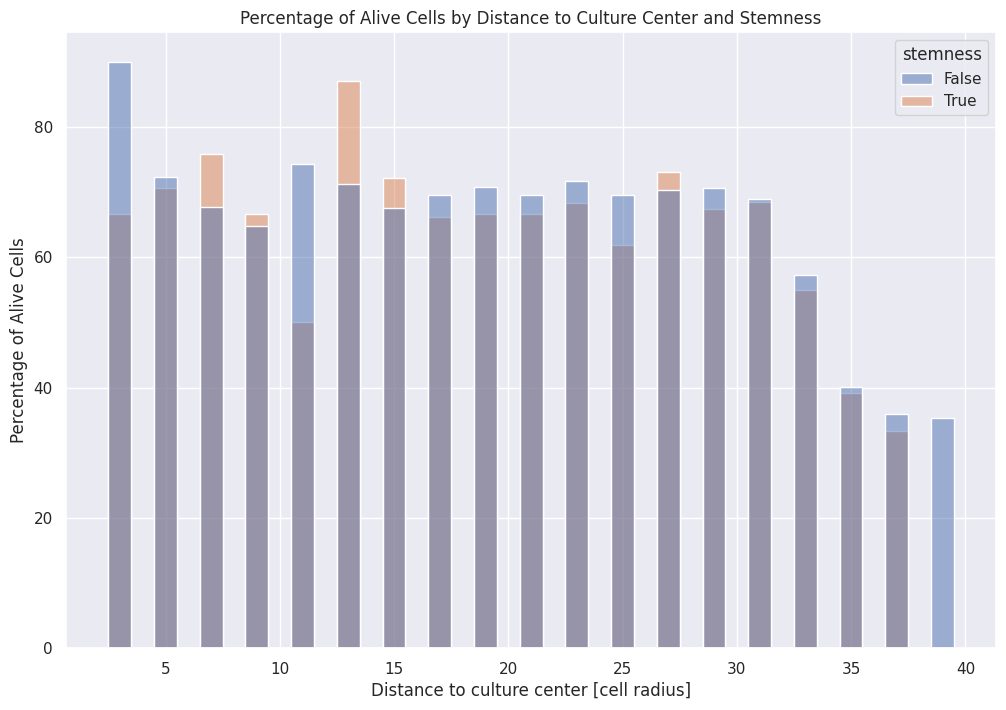

In [133]:
# Create a new dataframe to store the percentage of alive cells per bin
bins = 20  # You can adjust the number of bins as needed
df["bin"] = pd.cut(df["position_norm"], bins=bins)

# Calculate percentage of alive cells per bin
alive_counts = (
    df[df["killed"] == False]
    .groupby(["bin", "stemness"], observed=True)
    .size()
)
total_counts = df.groupby(["bin", "stemness"], observed=True).size()
alive_percentage = (alive_counts / total_counts * 100).reset_index(
    name="alive_percentage"
)

# Convert the bin labels to their midpoints
alive_percentage["bin_mid"] = alive_percentage["bin"].apply(lambda x: x.mid)

# Set the style
sns.set(style="darkgrid")

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the histogram
sns.histplot(
    data=alive_percentage,
    x="bin_mid",
    weights="alive_percentage",
    hue="stemness",
)
# , multiple='dodge', shrink=0.8, binwidth=(alive_percentage['bin_mid'].max() - alive_percentage['bin_mid'].min()) / bins

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.ylabel("Percentage of Alive Cells")
plt.title(
    "Percentage of Alive Cells by Distance to Culture Center and Stemness"
)

# Show plot
plt.show()

In [135]:
name = "Percentage of Alive Cells by Distance to Culture Center and Stemness"
name = name.replace(" ", "_").lower()
print(name)

percentage_of_alive_cells_by_distance_to_culture_center_and_stemness


## Dos $p_s$ y dos $\beta$

In [136]:
sim_2 = Simulation(
    prob_stem=[0.2, 0.4, 0.6],
    prob_diff=[0],
    prob_supervivence_radiotherapy=[0.6],  # no hace nada ahora
    num_of_realizations=1,
    num_of_steps_per_realization=28,
)

In [137]:
sim_2.simulate_parallel(
    sql=False,
)

### $p_s=0.4$

In [2]:
# Let's load the data for ps=0.4
df_4 = pd.read_csv(
    "radiotherapy_active_targeted_culture_pd=0_ps=0.4_rng_seed=1099062448631258.csv"
)
df_4.drop(columns=["Unnamed: 0"], inplace=True)
df_4.head()

,position_norm,stemness,active,susceptibility
0,0.000000,False,False,0.243068
1,2.000000,False,False,0.606643
2,2.000000,False,False,0.252293
3,3.323149,False,False,0.995778
4,3.855004,False,False,0.605770


In [3]:
# Let's kill some of them

s = 0.7  # survival probability of quiescent cells
beta1 = 0.8  # active cells have 80% less survival probability
beta2 = 0.5
beta3 = 0.3

df_active = df_4.loc[df_4["active"] == True]
df_quiescent = df_4.loc[df_4["active"] == False]

df_4.loc[df_4["active"] == False, "killed_1"] = df_4["susceptibility"] > s
df_4.loc[df_4["active"] == True, "killed_1"] = (
    df_4["susceptibility"] > beta1 * s
)

df_4.loc[df_4["active"] == False, "killed_2"] = df_4["susceptibility"] > s
df_4.loc[df_4["active"] == True, "killed_2"] = (
    df_4["susceptibility"] > beta2 * s
)

df_4.loc[df_4["active"] == False, "killed_3"] = df_4["susceptibility"] > s
df_4.loc[df_4["active"] == True, "killed_3"] = (
    df_4["susceptibility"] > beta3 * s
)


df_4["killed_1"] = df_4["killed_1"].astype(bool)
df_4["killed_2"] = df_4["killed_2"].astype(bool)
df_4["killed_3"] = df_4["killed_3"].astype(bool)

df_4.tail()

,position_norm,stemness,active,susceptibility,killed_1,killed_2,killed_3
21206,35.557149,False,True,0.145956,False,False,False
21207,39.112091,False,True,0.680168,True,True,True
21208,34.272493,False,True,0.878728,True,True,True
21209,32.193476,False,True,0.532181,False,True,True
21210,38.065462,False,True,0.642547,True,True,True


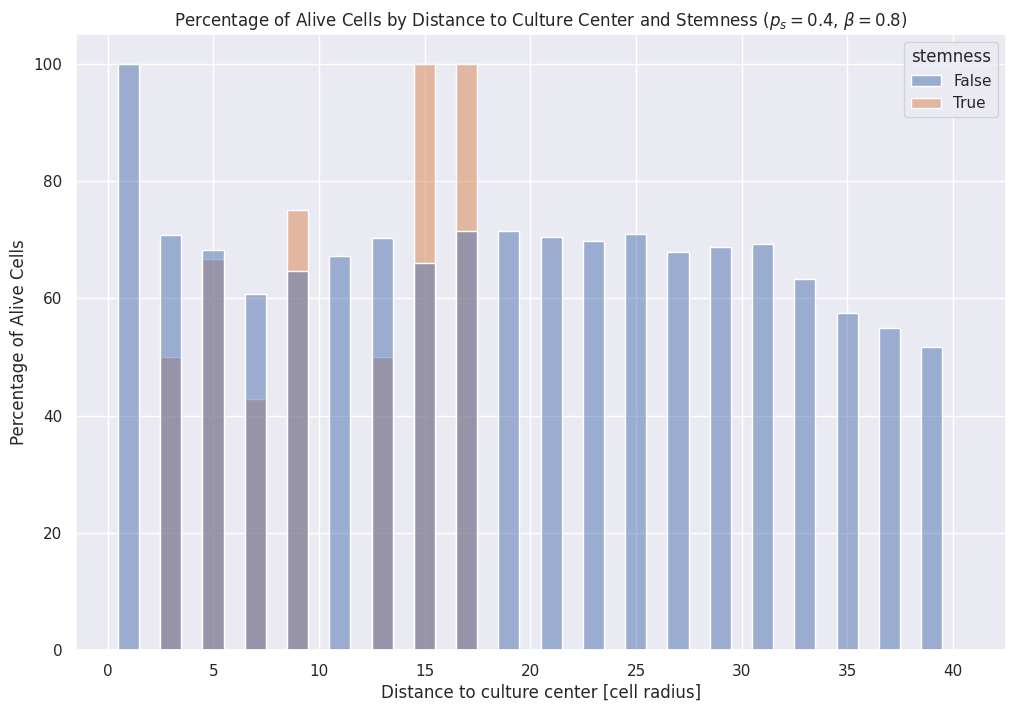

In [5]:
# Create a new dataframe to store the percentage of alive cells per bin
bins = 20  # You can adjust the number of bins as needed
df_4["bin"] = pd.cut(df_4["position_norm"], bins=bins)

# Note: killed1 --> beta=0.8, killed2 --> beta=0.5, killed3 --> beta=0.3

# Calculate percentage of alive cells per bin
alive_counts = (
    df_4[df_4["killed_1"] == False]
    .groupby(["bin", "stemness"], observed=True)
    .size()
)
total_counts = df_4.groupby(["bin", "stemness"], observed=True).size()
alive_percentage = (alive_counts / total_counts * 100).reset_index(
    name="alive_percentage"
)

# Convert the bin labels to their midpoints
alive_percentage["bin_mid"] = alive_percentage["bin"].apply(lambda x: x.mid)

# Set the style
sns.set(style="darkgrid")

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the histogram
sns.histplot(
    data=alive_percentage,
    x="bin_mid",
    weights="alive_percentage",
    hue="stemness",
)
# , multiple='dodge', shrink=0.8, binwidth=(alive_percentage['bin_mid'].max() - alive_percentage['bin_mid'].min()) / bins

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.ylabel("Percentage of Alive Cells")
plt.title(
    "Percentage of Alive Cells by Distance to Culture Center and Stemness ($p_s=0.4$, $\\beta=0.8$)"
)

# Show plot
plt.show()

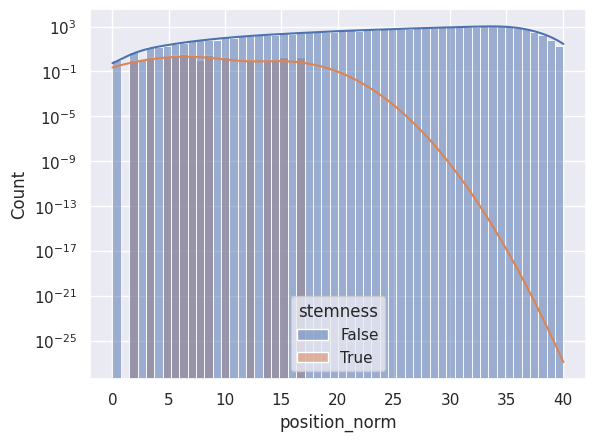

In [6]:
sns.histplot(
    data=df_4,
    x="position_norm",
    kde=True,
    hue="stemness",
    stat="count",
    common_norm=True,
)
plt.yscale("log")
plt.show()

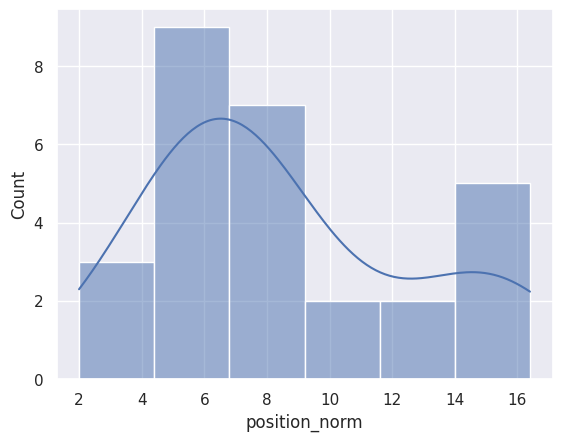

In [8]:
df_4_stem = df_4.loc[df_4["stemness"] == True]
sns.histplot(data=df_4_stem, x="position_norm", kde=True, stat="count")
plt.show()

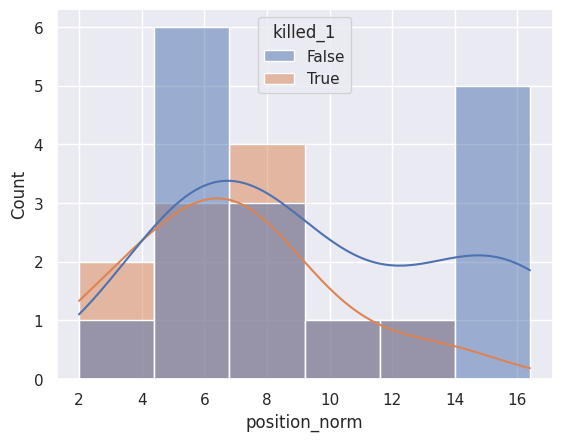

In [9]:
df_4_stem = df_4.loc[df_4["stemness"] == True]
sns.histplot(
    data=df_4_stem,
    x="position_norm",
    kde=True,
    hue="killed_1",
    stat="count",
    common_norm=True,
)
plt.show()

### $p_s=0.6$

In [3]:
# Let's load the data for ps=0.6
df_6 = pd.read_csv(
    "radiotherapy_active_targeted_culture_pd=0_ps=0.6_rng_seed=1099062448631258.csv"
)
df_6.drop(columns=["Unnamed: 0"], inplace=True)

# Let's kill some of them

s = 0.7  # survival probability of quiescent cells
beta1 = 0.8  # active cells have 80% less survival probability
beta2 = 0.5
beta3 = 0.3

df_active = df_6.loc[df_6["active"] == True]
df_quiescent = df_6.loc[df_6["active"] == False]

df_6.loc[df_6["active"] == False, "killed_1"] = df_6["susceptibility"] > s
df_6.loc[df_6["active"] == True, "killed_1"] = (
    df_6["susceptibility"] > beta1 * s
)

df_6.loc[df_6["active"] == False, "killed_2"] = df_6["susceptibility"] > s
df_6.loc[df_6["active"] == True, "killed_2"] = (
    df_6["susceptibility"] > beta2 * s
)

df_6.loc[df_6["active"] == False, "killed_3"] = df_6["susceptibility"] > s
df_6.loc[df_6["active"] == True, "killed_3"] = (
    df_6["susceptibility"] > beta3 * s
)


df_6["killed_1"] = df_6["killed_1"].astype(bool)
df_6["killed_2"] = df_6["killed_2"].astype(bool)
df_6["killed_3"] = df_6["killed_3"].astype(bool)

df_6.head()

,position_norm,stemness,active,susceptibility,killed_1,killed_2,killed_3
0,0.000000,True,False,0.967860,True,True,True
1,2.000000,True,False,0.104409,False,False,False
2,2.000000,False,False,0.111724,False,False,False
3,2.974926,False,False,0.979707,True,True,True
4,4.683681,False,False,0.621547,False,False,False


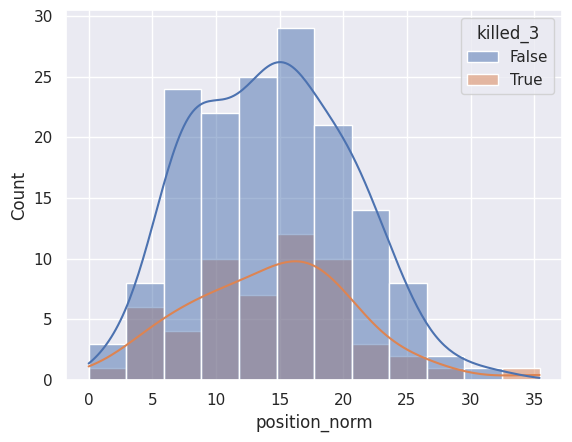

In [14]:
df_6_stem = df_6.loc[df_6["stemness"] == True]
sns.histplot(
    data=df_6_stem,
    x="position_norm",
    kde=True,
    hue="killed_3",
    stat="count",
    common_norm=True,
)
plt.show()

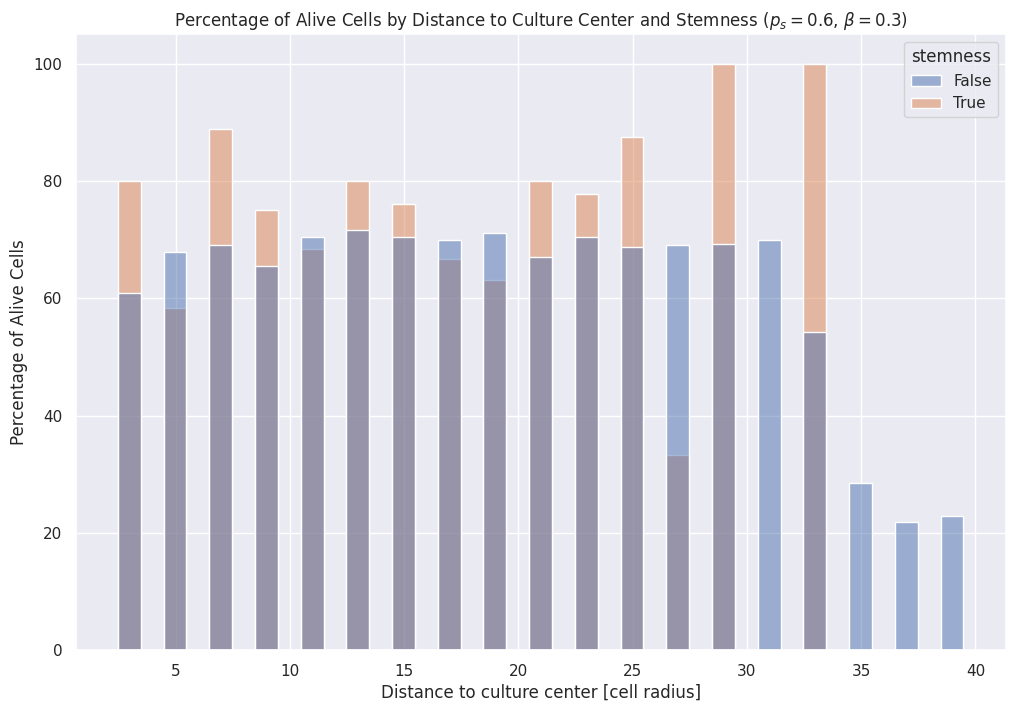

In [13]:
# Create a new dataframe to store the percentage of alive cells per bin
bins = 20  # You can adjust the number of bins as needed
df_6["bin"] = pd.cut(df_6["position_norm"], bins=bins)

# Note: killed1 --> beta=0.8, killed2 --> beta=0.5, killed3 --> beta=0.3

# Calculate percentage of alive cells per bin
alive_counts = (
    df_6[df_6["killed_3"] == False]
    .groupby(["bin", "stemness"], observed=True)
    .size()
)
total_counts = df_6.groupby(["bin", "stemness"], observed=True).size()
alive_percentage = (alive_counts / total_counts * 100).reset_index(
    name="alive_percentage"
)

# Convert the bin labels to their midpoints
alive_percentage["bin_mid"] = alive_percentage["bin"].apply(lambda x: x.mid)

# Set the style
sns.set(style="darkgrid")

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the histogram
sns.histplot(
    data=alive_percentage,
    x="bin_mid",
    weights="alive_percentage",
    hue="stemness",
)
# , multiple='dodge', shrink=0.8, binwidth=(alive_percentage['bin_mid'].max() - alive_percentage['bin_mid'].min()) / bins

# Set labels and title
plt.xlabel("Distance to culture center [cell radius]")
plt.ylabel("Percentage of Alive Cells")
plt.title(
    "Percentage of Alive Cells by Distance to Culture Center and Stemness ($p_s=0.6$, $\\beta=0.3$)"
)

# Show plot
plt.show()

<Axes: xlabel='position_norm', ylabel='Count'>

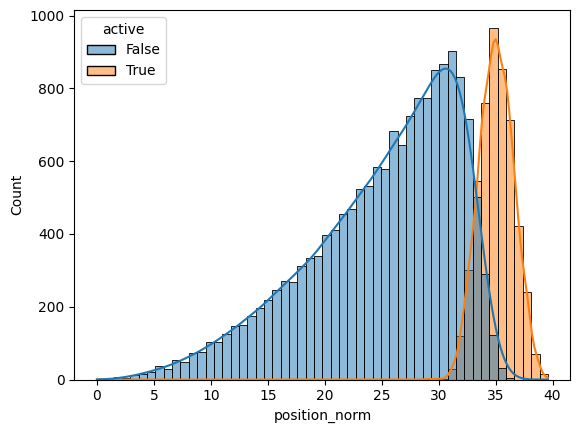

In [6]:
# df_6_stem = df_6.loc[df_6["stemness"] == True]
sns.histplot(
    data=df_6,
    x="position_norm",
    kde=True,
    hue="active",
    stat="count",
    common_norm=True,
)

In [5]:
df_6.columns

Index(['position_norm', 'stemness', 'active', 'susceptibility', 'killed_1',
       'killed_2', 'killed_3'],
      dtype='object')